In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib
from sklearn.decomposition import PCA
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection

Using matplotlib backend: Qt5Agg


In [2]:
df = pd.read_csv('vgsales.csv')
#df = df[:-15500]

In [3]:
number = LabelEncoder()

df['Name'] = number.fit_transform(df['Name'].astype('str'))
 

In [4]:
data_na = (df.isnull().sum() / len(df)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio
Year,1.632727
Publisher,0.349440


Text(0.5, 0, 'year')

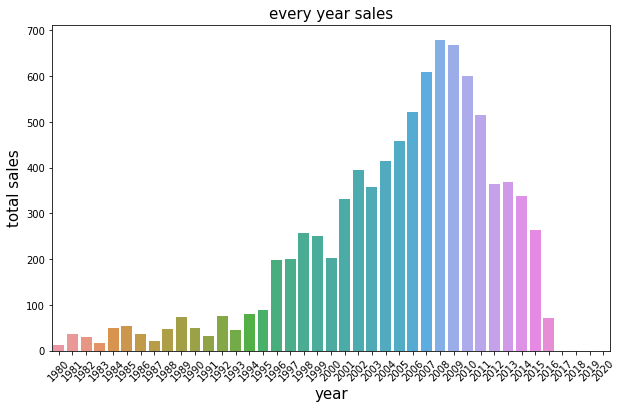

In [5]:
import seaborn as sns
min_year = int(df['Year'].dropna().min())
max_year = int(df['Year'].dropna().max())
year_range = range(min_year,max_year+1)
year_sale = []
year_list = []
for year in year_range:
    year_sale.append(df[df['Year'] == year].dropna()['Global_Sales'].sum())
    year_list.append(year)

fig,ax = plt.subplots(figsize=(10,6))
sns.barplot(x = year_list,y = year_sale,ax=ax)
plt.title('every year sales',fontsize=15 )
ticks = plt.setp(ax.get_xticklabels(),fontsize=10,rotation=45)
plt.ylabel('total sales',fontsize=15)
plt.xlabel('year',fontsize=15)

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


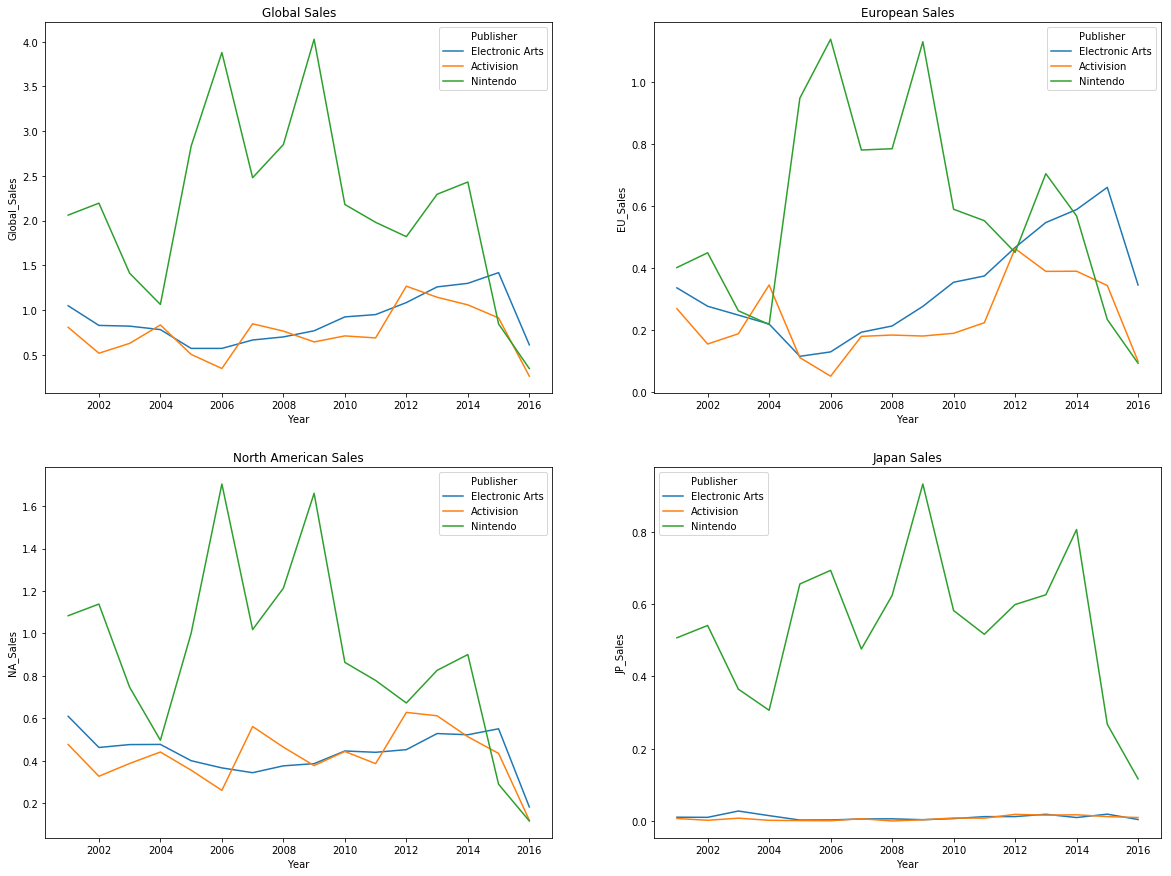

In [6]:
df = df[(df.Year > 2000.0) & ((df.Publisher =="Nintendo")|(df.Publisher == "Activision")|(df.Publisher == "Electronic Arts"))]
plt.figure(figsize=(20,15))
plt.subplot(221)
sns.lineplot(y = df.Global_Sales,x = df.Year,hue=df.Publisher,err_style=None)
plt.title("Global Sales")
plt.subplot(222)
sns.lineplot(y = df.EU_Sales,x = df.Year,hue=df.Publisher,err_style=None)
plt.title("European Sales")
plt.subplot(223)
sns.lineplot(y = df.NA_Sales,x = df.Year,hue=df.Publisher,err_style=None)
plt.title("North American Sales")
plt.subplot(224)
sns.lineplot(y = df.JP_Sales,x = df.Year,hue=df.Publisher,err_style=None)
plt.title("Japan Sales")
plt.show()



In [7]:
df = df.drop(['Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Platform','Year','Rank'], axis=1)


In [8]:
array = df.values
X = df[['Name']]
Y = df[['Global_Sales']]


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(Y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("Y_test shape: {}".format(Y_test.shape))

X_train shape: (1949, 1)
Y_train shape: (1949, 1)
X_test shape: (650, 1)
Y_test shape: (650, 1)


In [10]:
data_na = (df.isnull().sum() / len(df)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio


In [11]:
#df = df[:-15500]

In [12]:
Y_train = np.log1p(Y_train)
Y_test = np.log1p(Y_test)

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

D:\anaconda\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [18]:
param_grid_lr = [
    {}
]
param_grid_svr = [
    {'C': [0.01, 0.1, 1, 10], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
     'kernel': ['rbf']}
]

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

grid_search_lr = GridSearchCV(LinearRegression(), param_grid_lr, scoring='neg_mean_squared_error',  cv=5)
grid_search_lr.fit(X_train, Y_train)
lr_best_cross_val_score = (np.sqrt(-grid_search_lr.best_score_))
print("cross validation score: {:.2f}".format(np.expm1(lr_best_cross_val_score)))
lr_score = np.sqrt(-grid_search_lr.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(lr_score)))

cross validation score: 0.68
Test set score: 0.73


In [20]:
from sklearn.svm import SVR

grid_search_svr = GridSearchCV(SVR(), param_grid_svr, cv=5, scoring='neg_mean_squared_error')
grid_search_svr.fit(X_train, Y_train)
svr_best_cross_val_score = (np.sqrt(-grid_search_svr.best_score_))
print("Best cross-validation score: {:.2f}".format(np.expm1(svr_best_cross_val_score)))
svr_score = np.sqrt(-grid_search_svr.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(svr_score)))

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best cross-validation score: 0.57
Test set score: 0.58


In [21]:
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn import neighbors
rmse_val = []
for K in range(100):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, Y_train)  
    pred=model.predict(X_test) 
    error = sqrt(mean_squared_error(Y_test,pred)) 
    rmse_val.append(error) 
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.5596475260681059
RMSE value for k=  2 is: 0.47944528353956
RMSE value for k=  3 is: 0.4754904773280576
RMSE value for k=  4 is: 0.4703379710903737
RMSE value for k=  5 is: 0.47438705444336976
RMSE value for k=  6 is: 0.4740020658967919
RMSE value for k=  7 is: 0.4623625231010482
RMSE value for k=  8 is: 0.46392061552023933
RMSE value for k=  9 is: 0.4674917209011803
RMSE value for k=  10 is: 0.46918482364345615
RMSE value for k=  11 is: 0.4719602390941327
RMSE value for k=  12 is: 0.47209735714686746
RMSE value for k=  13 is: 0.4737564505571469
RMSE value for k=  14 is: 0.47640792825609707
RMSE value for k=  15 is: 0.4778380318487981
RMSE value for k=  16 is: 0.48052891654108226
RMSE value for k=  17 is: 0.483726837742549
RMSE value for k=  18 is: 0.4853665350512408
RMSE value for k=  19 is: 0.4880635030263353
RMSE value for k=  20 is: 0.48875338283533903
RMSE value for k=  21 is: 0.4888440168498294
RMSE value for k=  22 is: 0.49099993558077487
RMSE value for

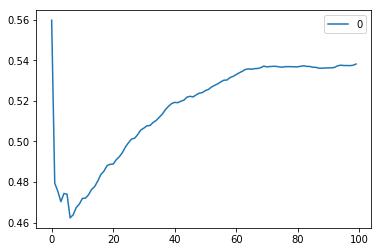

In [22]:
curve = pd.DataFrame(rmse_val)
curve.plot()